# Lab 1. Types of data: continuous, discrete, panel data, time-series

## Intro and objectives

### Data comes from many sources: sensor measurements, events, text, images, and videos. The Internet of Things (IoT) is spewing out streams of information. Much of this data is unstructured: images are a collection of pixels with each pixel containing RGB (red, green, blue) color information. 
### Texts are sequences of words and nonword characters, often organized by sections, subsections, and so on. Clickstreams are sequences of actions by a user interacting with an app or web page. In fact, a major challenge of data science is to harness this torrent of raw data into actionable information. 

### Prior to the appliction of any statistical technique, unstructured raw data must be processed and manipulated into a structured form.

### In this lab you will learn:
1
2
3


## 0. Let's load required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1. Let's load some data
### 1.1. COVID-19.

#### In the covid19_cases.csv file, we have an export from the daily number of new reported cases of COVID-19 by country worldwide dataset provided by the European Centre for Disease Prevention and Control (ECDC), which can be found at https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide.
#### For scripted or automated collection of this data, the ECDC makes the current day's CSV file available via https://opendata.ecdc.europa.eu/covid19/casedistribution/csv. 

#### The snapshot we will be using was collected on September 19, 2020 and contains the number of new COVID-19 cases per country from December 31, 2019 through September 18, 2020, with partial data for September 19, 2020. For this chapter, we will look at the 8-month span from January 18, 2020 through September 18, 2020.


In [13]:
covidDataFrame = pd.read_csv('../data/covid19_cases.csv',parse_dates=['dateRep'])

In [14]:
covidDataFrame.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-09-19,19,9,2020,47,1,Afghanistan,AF,AFG,38041757,Asia,1.616645
1,2020-09-18,18,9,2020,0,0,Afghanistan,AF,AFG,38041757,Asia,1.535155
2,2020-09-17,17,9,2020,17,0,Afghanistan,AF,AFG,38041757,Asia,1.653446
3,2020-09-16,16,9,2020,40,10,Afghanistan,AF,AFG,38041757,Asia,1.708649
4,2020-09-15,15,9,2020,99,6,Afghanistan,AF,AFG,38041757,Asia,1.627159


In [4]:
covidDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40761 entries, 0 to 40760
Data columns (total 14 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   Unnamed: 0                                                  40761 non-null  int64         
 1   Unnamed: 0.1                                                40761 non-null  int64         
 2   dateRep                                                     40761 non-null  datetime64[ns]
 3   day                                                         40761 non-null  int64         
 4   month                                                       40761 non-null  int64         
 5   year                                                        40761 non-null  int64         
 6   cases                                                       40761 non-null  int64         
 7   deaths                

## 2. Continuous variables
#### Continous data can take any real value within a range (e.g. from zero to 100, from zero to infinity, etc)
#### From a practical standpoint a variable that can take more than a hundred values can be considered continuous.
#### In our COVID-19 dataset the columns: "cases", "deaths", "popData2019" and "Cumulative_number_for_14_days_of_COVID-19_cases_per_100000" are instances of continuous data.


In [5]:
covidDataFrame[['cases','deaths','popData2019','Cumulative_number_for_14_days_of_COVID-19_cases_per_100000']]

,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,47,1,38041757,1.616645
1,0,0,38041757,1.535155
2,17,0,38041757,1.653446
3,40,10,38041757,1.708649
4,99,6,38041757,1.627159
...,...,...,...,...
40756,0,0,14645473,0.047796
40757,0,0,14645473,0.047796
40758,0,0,14645473,0.047796
40759,1,0,14645473,0.054624


In [6]:
covidDataFrame[['cases','deaths','popData2019','Cumulative_number_for_14_days_of_COVID-19_cases_per_100000']].describe()

,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,40761.000000,40761.000000,4.076100e+04,40761.000000
mean,748.721449,23.365496,4.345654e+07,33.013851
std,4503.332712,130.859018,1.592115e+08,76.182769
min,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,0.000000,0.000000,1.355982e+06,0.374423
50%,13.000000,0.000000,8.519373e+06,4.575245
75%,178.000000,3.000000,2.916192e+07,26.474032
max,97894.000000,4928.000000,1.433784e+09,1058.225943


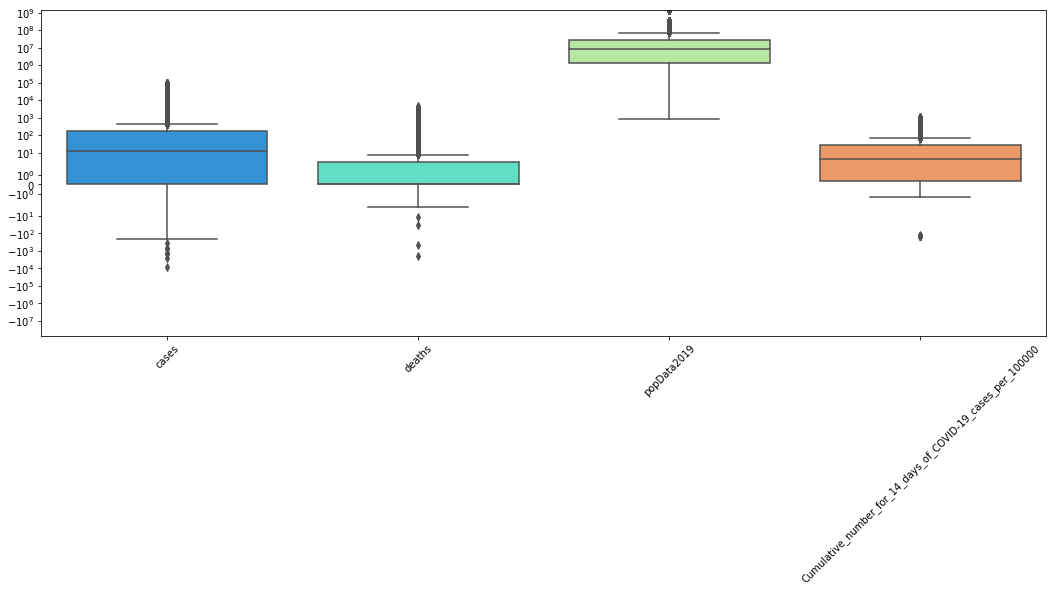

In [7]:
fig, ax= plt.subplots(figsize=(18, 6))
sns.boxplot(data=covidDataFrame[['cases','deaths','popData2019','Cumulative_number_for_14_days_of_COVID-19_cases_per_100000']],palette='rainbow')
plt.xticks(rotation=45)
ax.set_yscale('symlog')

## 3. Time-related variables
#### Time related variables (e.g. timestamp, date, time interval) are usually considered a different category on their own
#### In our COVID-19 dataset the variables: 'dateRep','day', 'month', 'year' belong to this category.

In [8]:
covidDataFrame[['dateRep','day', 'month', 'year']]

,dateRep,day,month,year
0,2020-09-19,19,9,2020
1,2020-09-18,18,9,2020
2,2020-09-17,17,9,2020
3,2020-09-16,16,9,2020
4,2020-09-15,15,9,2020
...,...,...,...,...
40756,2020-07-04,7,4,2020
40757,2020-06-04,6,4,2020
40758,2020-05-04,5,4,2020
40759,2020-04-04,4,4,2020


<AxesSubplot:xlabel='dateRep', ylabel='cases'>

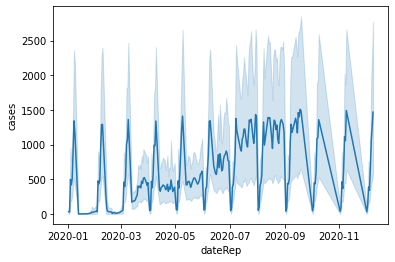

In [9]:
sns.lineplot(x="dateRep", y="cases",data=covidDataFrame)

<AxesSubplot:xlabel='dateRep', ylabel='deaths'>

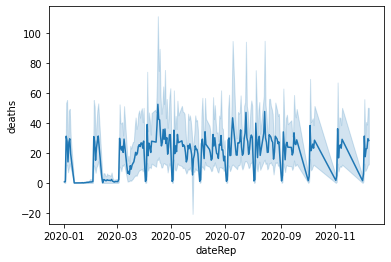

In [10]:
sns.lineplot(x="dateRep", y="deaths",data=covidDataFrame)

## 4. Discrete variables
#### Discrete data can take a limited set of values within a range (e.g. [0,1,2], [yes, no], [heads,tails])
#### In our COVID-19 dataset the variables: 'countriesAndTerritories', 'geoId', 'countryterritoryCode' and 'continentExp' are instances of discrete data.

In [11]:
covidDataFrame[['day', 'month', 'year','countriesAndTerritories', 'geoId', 'countryterritoryCode','continentExp']]

,day,month,year,countriesAndTerritories,geoId,countryterritoryCode,continentExp
0,19,9,2020,Afghanistan,AF,AFG,Asia
1,18,9,2020,Afghanistan,AF,AFG,Asia
2,17,9,2020,Afghanistan,AF,AFG,Asia
3,16,9,2020,Afghanistan,AF,AFG,Asia
4,15,9,2020,Afghanistan,AF,AFG,Asia
...,...,...,...,...,...,...,...
40756,7,4,2020,Zimbabwe,ZW,ZWE,Africa
40757,6,4,2020,Zimbabwe,ZW,ZWE,Africa
40758,5,4,2020,Zimbabwe,ZW,ZWE,Africa
40759,4,4,2020,Zimbabwe,ZW,ZWE,Africa


### 4.1. Categorical variables
#### Categorical variables are discrete variables that can take on only a specific set of values representing a set of possible categories (e.g. [yes, no], [male,female], [white, brown, yellow],[France, Germany,Spain, UK])

#### In our COVID-19 dataset the variables: 'countriesAndTerritories' and 'continentExp' are instances of categorical variables.

In [12]:
covidDataFrame.groupby(['continentExp','countriesAndTerritories']).count()

Unnamed: 0  Unnamed: 0.1  dateRep  day  \
continentExp countriesAndTerritories                                            
Africa       Algeria                          246           246      246  246   
             Angola                           169           169      169  169   
             Benin                            174           174      174  174   
             Botswana                         159           159      159  159   
             Burkina_Faso                     178           178      178  178   
...                                           ...           ...      ...  ...   
Oceania      Guam                             172           172      172  172   
             New_Caledonia                    170           170      170  170   
             New_Zealand                      242           242      242  242   
             Northern_Mariana_Islands         160           160      160  160   
             Papua_New_Guinea                 170           170      170  170   

                                       month  year  cases  deaths  geoId  \
continentExp countriesAndTerritories                                       
Africa       Algeria                     246   246    246     246    246   
             Angola                      169   169    169     169    169   
             Benin                       174   174    174     174    174   
             Botswana                    159   159    159     159    159   
             Burkina_Faso                178   178    178     178    178   
...                                      ...   ...    ...     ...    ...   
Oceania      Guam                        172   172    172     172    172   
             New_Caledonia               170   170    170     170    170   
             New_Zealand                 242   242    242     242    242   
             Northern_Mariana_Islands    160   160    160     160    160   
             Papua_New_Guinea            170   170    170     170    170   

                                       countryterritoryCode  popData2019  \
continentExp countriesAndTerritories                                       
Africa       Algeria                                    246          246   
             Angola                                     169          169   
             Benin                                      174          174   
             Botswana                                   159          159   
             Burkina_Faso                               178          178   
...                                                     ...          ...   
Oceania      Guam                                       172          172   
             New_Caledonia                              170          170   
             New_Zealand                                242          242   
             Northern_Mariana_Islands                   160          160   
             Papua_New_Guinea                           170          170   

                                       Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
continentExp countriesAndTerritories                                                               
Africa       Algeria                                                                 246           
             Angola                                                                  169           
             Benin                                                                   174           
             Botswana                                                                159           
             Burkina_Faso                                                            178           
...                                                                                  ...           
Oceania      Guam                                                                    172           
             New_Caledonia                                                           170           
       

### 4.2. Ordinal variables
#### Ordinal variables are categorical variables that have an explicit ordering (e.g. [really bad, bad, good, really good],[1,2,3,4,5])